In [1]:
# !pip install fasteda
# from fasteda import fast_eda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

In [2]:
train = pd.read_csv("./train.csv").drop('id',axis=1)
test = pd.read_csv("./test.csv").drop('id',axis=1)
original = pd.read_csv("./ConcreteStrengthData.csv")

In [3]:
original = original.rename(columns={'CementComponent ':'CementComponent'})

In [4]:
print(original.columns)
print(train.columns)

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')
Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')


In [5]:
print(len(train))
print(len(test))

5407
3605


In [6]:
train = pd.concat([train,original],axis=0)
train = train.drop_duplicates().reset_index(drop=True)
train = train[train['AgeInDays'] != 49]
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [7]:
print(len(train))
print(len(test))

6411
3605


In [8]:
# Calculate TotalComponentWeight
# train['TotalComponentWeight'] = train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'] + train['WaterComponent'] + train['SuperplasticizerComponent'] + train['CoarseAggregateComponent'] + train['FineAggregateComponent']

# Calculate Water-Cement-Ratio (WCR)
train['WCR'] = train['WaterComponent'] / train['CementComponent']

# Calculate Aggregate-Ratio (AR)
train['AR'] = (train['CoarseAggregateComponent'] + train['FineAggregateComponent']) / train['CementComponent']

# Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
train['WCPR'] = train['WaterComponent'] / (train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'])

# Calculate Cement-Age
train['Cement-Age'] = train['CementComponent'] * train['AgeInDays']

# Calculate TotalComponentWeight
# test['TotalComponentWeight'] = test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'] + test['WaterComponent'] + test['SuperplasticizerComponent'] + test['CoarseAggregateComponent'] + test['FineAggregateComponent']

# Calculate Water-Cement-Ratio (WCR)
test['WCR'] = test['WaterComponent'] / test['CementComponent']

# Calculate Aggregate-Ratio (AR)
test['AR'] = (test['CoarseAggregateComponent'] + test['FineAggregateComponent']) / test['CementComponent']

# Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
test['WCPR'] = test['WaterComponent'] / (test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'])

# Calculate Cement-Age
test['Cement-Age'] = test['CementComponent'] * test['AgeInDays']

In [9]:
# train['Unknown'] = (train.CoarseAggregateComponent-train.FlyAshComponent) - (train.CementComponent + train.BlastFurnaceSlag + train.FlyAshComponent + train.WaterComponent + train.SuperplasticizerComponent)
# test['Unknown'] = (test.CoarseAggregateComponent-test.FlyAshComponent) - (test.CementComponent + test.BlastFurnaceSlag + test.FlyAshComponent + test.WaterComponent + test.SuperplasticizerComponent)

In [10]:
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,WCR,AR,WCPR,Cement-Age
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38,0.354286,3.310476,0.354286,1575.0
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52,1.335664,11.258741,0.419780,4004.0
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96,0.642561,6.471626,0.438282,8092.0
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05,0.750000,5.269737,0.600000,110960.0
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19,1.222930,10.933758,0.488550,14130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.649783,5.927641,0.372074,7739.2
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.608318,5.063004,0.447693,9021.6
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,1.297643,11.261953,0.486003,4158.0
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,1.103708,11.178504,0.507808,4454.8


In [11]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 11, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [12]:
test.loc[197,'AgeInDays'] = 14

In [13]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])
# 90,91일 붙이기, 360-365일 붙이기

[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [14]:
print(len(train))
print(len(test))

6411
3605


In [15]:
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,WCR,AR,WCPR,Cement-Age
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38,0.354286,3.310476,0.354286,1575.0
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52,1.335664,11.258741,0.419780,4004.0
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96,0.642561,6.471626,0.438282,8092.0
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05,0.750000,5.269737,0.600000,110960.0
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19,1.222930,10.933758,0.488550,14130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.649783,5.927641,0.372074,7739.2
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.608318,5.063004,0.447693,9021.6
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,1.297643,11.261953,0.486003,4158.0
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,1.103708,11.178504,0.507808,4454.8


In [16]:
from sklearn.preprocessing import MinMaxScaler
encoder = MinMaxScaler()
encoder.fit(np.array([i for i in sorted(train.AgeInDays.unique())]).reshape(-1,1))
train.AgeInDays = encoder.transform(np.array(train.AgeInDays).reshape(-1,1))
test.AgeInDays = encoder.transform(np.array(test.AgeInDays).reshape(-1,1))

In [17]:
from sklearn.preprocessing import StandardScaler

standard_target = ['CementComponent','BlastFurnaceSlag','FlyAshComponent','WaterComponent',
                  'SuperplasticizerComponent','CoarseAggregateComponent','FineAggregateComponent']
                  #'TotalComponentWeight','WCR','AR','WCPR','Cement-Age']

for i in standard_target:
    # tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
    tar = np.array([i for i in train[f'{i}']]).reshape(-1,1)
    encoder = StandardScaler()
    encoder.fit(tar)
    train[f'{i}'] = encoder.transform(np.array(train[f'{i}']).reshape(-1,1))
    test[f'{i}'] = encoder.transform(np.array(test[f'{i}']).reshape(-1,1))

train = train.reset_index(drop=True)

In [18]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,WCR,AR,WCPR,Cement-Age
count,6.411000e+03,6.411000e+03,6.411000e+03,6.411000e+03,6.411000e+03,6.411000e+03,6.411000e+03,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000
mean,5.408592e-16,-5.541591e-17,-3.546618e-17,-1.352148e-15,2.216636e-17,1.516179e-15,-1.117185e-15,0.136890,35.415860,0.718428,6.872551,0.503668,15748.312479
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,0.189823,16.379638,0.300063,2.819865,0.150839,24887.600160
min,-1.836480e+00,-7.228331e-01,-6.256029e-01,-3.302575e+00,-7.641307e-01,-2.430530e+00,-2.247139e+00,0.000000,2.330000,0.259364,2.880105,0.179278,306.000000
25%,-7.900923e-01,-7.228331e-01,-6.256029e-01,-5.839414e-01,-7.641307e-01,-6.617901e-01,-4.705537e-01,0.016484,23.640000,0.502618,4.689741,0.400000,2779.000000
50%,-1.276937e-03,-7.228331e-01,-6.256029e-01,7.336854e-02,-7.641307e-01,-1.763548e-01,1.207971e-01,0.074176,33.940000,0.630435,5.976783,0.488550,7756.000000
75%,7.392436e-01,8.226023e-01,1.028307e+00,3.888773e-01,7.349432e-01,7.454558e-01,6.273075e-01,0.151099,45.710000,0.850071,8.592708,0.580060,15232.700000
max,2.311193e+00,3.556285e+00,2.893241e+00,3.281041e+00,4.816237e+00,2.010686e+00,2.800237e+00,1.000000,82.600000,1.989247,18.696078,1.989247,197100.000000


In [19]:
drop_list = []

for tar in standard_target:
    for i in range(len(train)):
        if abs(train.loc[i,tar]) > 2.6:
            drop_list.append(i)

print('drop :',len(set(drop_list)))
train = train.drop(sorted(list(set(drop_list)))).reset_index(drop=True)

drop : 294


In [20]:
train = train.sort_values('Strength').reset_index(drop=True)

In [21]:
# tar = ['Cement-Age','AgeInDays','WCPR','SuperplasticizerComponent','WaterComponent']
# test = test.loc[:,tar]
# tar.append('Strength')
# train = train.loc[:,tar]

In [22]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,WCR,AR,WCPR,Cement-Age
count,6117.000000,6117.000000,6117.000000,6117.000000,6117.000000,6117.000000,6117.000000,6117.000000,6117.000000,6117.000000,6117.000000,6117.000000,6117.000000
mean,0.004137,-0.056413,-0.012349,0.036551,-0.064666,0.034280,0.006669,0.139155,35.261188,0.717607,6.863504,0.510740,16029.695128
std,0.990042,0.936970,0.977366,0.943117,0.881821,0.991245,0.983089,0.193301,16.265376,0.296590,2.817825,0.148914,25338.587419
min,-1.836480,-0.722833,-0.625603,-2.461219,-0.764131,-2.430530,-2.247139,0.000000,2.330000,0.259364,2.880105,0.204651,306.000000
25%,-0.780623,-0.722833,-0.625603,-0.515581,-0.764131,-0.659208,-0.411039,0.016484,23.520000,0.508021,4.696543,0.402253,2779.000000
50%,0.000617,-0.722833,-0.625603,0.146987,-0.764131,-0.145370,0.123330,0.074176,33.800000,0.630282,5.949458,0.504620,7868.000000
75%,0.631291,0.717827,1.027427,0.388877,0.656957,0.745456,0.627307,0.151099,45.080000,0.849860,8.562939,0.580060,15405.600000
max,2.311193,2.525201,2.576704,2.281930,2.528633,2.010686,2.488733,1.000000,82.600000,1.989247,18.696078,1.989247,197100.000000


In [23]:
train.corr()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,WCR,AR,WCPR,Cement-Age
CementComponent,1.000000,-0.370977,-0.309907,0.029751,-0.060601,0.063629,-0.393501,0.098084,0.194425,-0.883082,-0.917474,-0.474121,0.298379
BlastFurnaceSlag,-0.370977,1.000000,-0.175128,0.055423,0.133649,-0.283335,-0.155751,-0.043766,0.075218,0.466618,0.381549,-0.253686,-0.125869
FlyAshComponent,-0.309907,-0.175128,1.000000,-0.391596,0.556484,-0.096293,0.134975,-0.140799,0.022820,0.155747,0.268223,-0.255537,-0.183349
WaterComponent,0.029751,0.055423,-0.391596,1.000000,-0.647567,-0.124844,-0.340923,0.259474,-0.124348,0.195727,-0.067639,0.402392,0.246301
SuperplasticizerComponent,-0.060601,0.133649,0.556484,-0.647567,1.000000,-0.265092,0.139778,-0.189085,0.207357,-0.096701,0.028603,-0.492932,-0.189508
CoarseAggregateComponent,0.063629,-0.283335,-0.096293,-0.124844,-0.265092,1.000000,-0.246932,-0.022016,-0.093899,-0.108924,0.011080,0.115298,0.015144
FineAggregateComponent,-0.393501,-0.155751,0.134975,-0.340923,0.139778,-0.246932,1.000000,-0.128027,-0.115535,0.220658,0.362668,0.311563,-0.226332
AgeInDays,0.098084,-0.043766,-0.140799,0.259474,-0.189085,-0.022016,-0.128027,1.000000,0.337587,-0.041409,-0.105205,0.067740,0.938938
Strength,0.194425,0.075218,0.022820,-0.124348,0.207357,-0.093899,-0.115535,0.337587,1.000000,-0.192623,-0.187550,-0.271237,0.326211
WCR,-0.883082,0.466618,0.155747,0.195727,-0.096701,-0.108924,0.220658,-0.041409,-0.192623,1.000000,0.952502,0.479513,-0.213532


<AxesSubplot: >

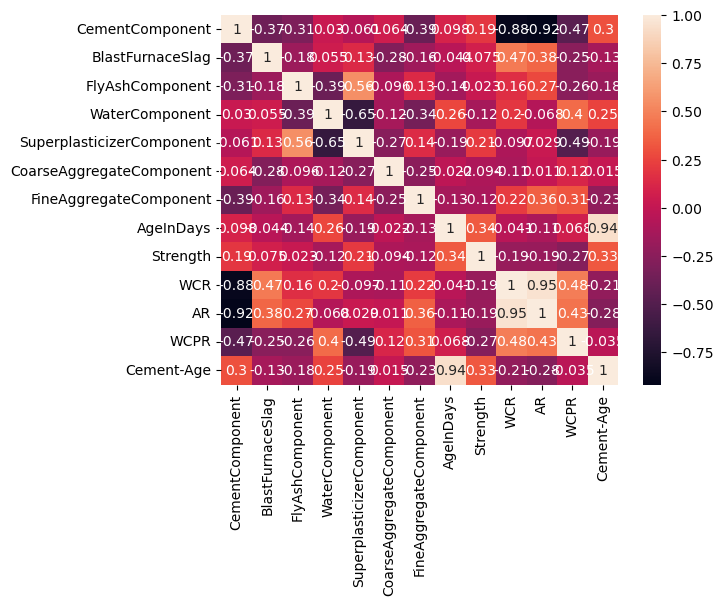

In [24]:
sns.heatmap(train.corr(),annot=True)

In [25]:
# tar = ['SuperplasticizerComponent','AgeInDays','WCPR','Cement-Age']
# test = test.loc[:,tar]
# tar.append('Strength')
# train = train.loc[:,tar]

C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

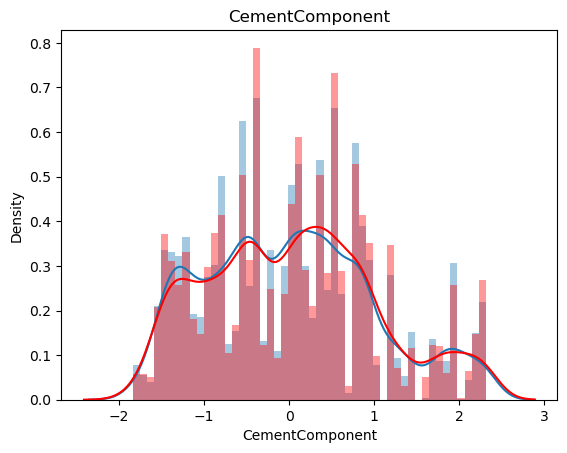

C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

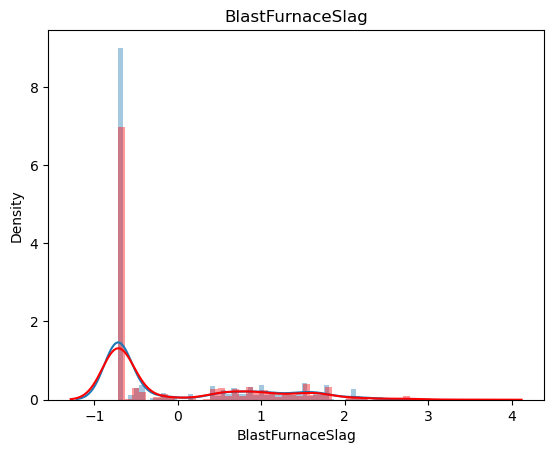

C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

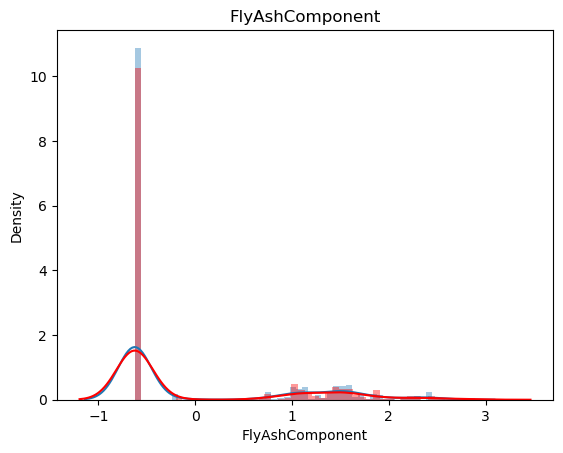

C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

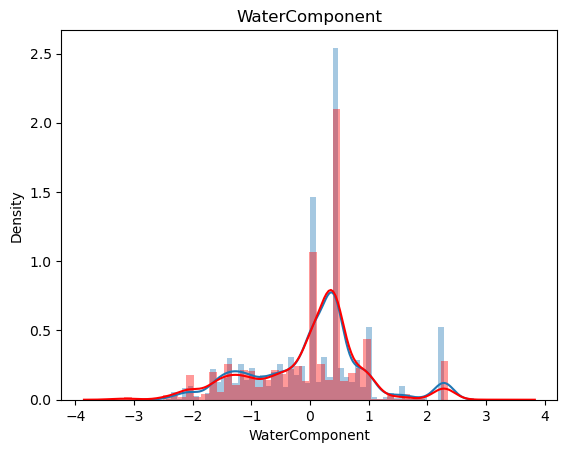

C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

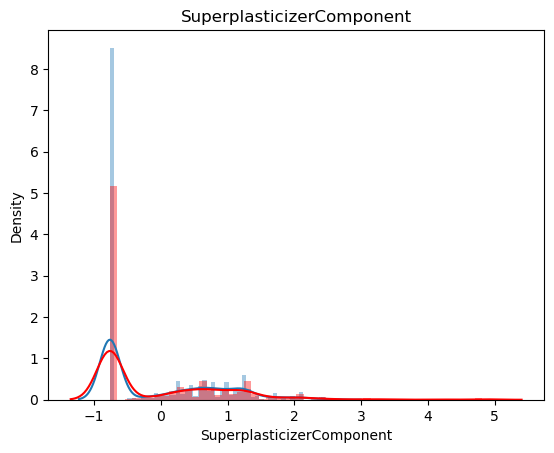

C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

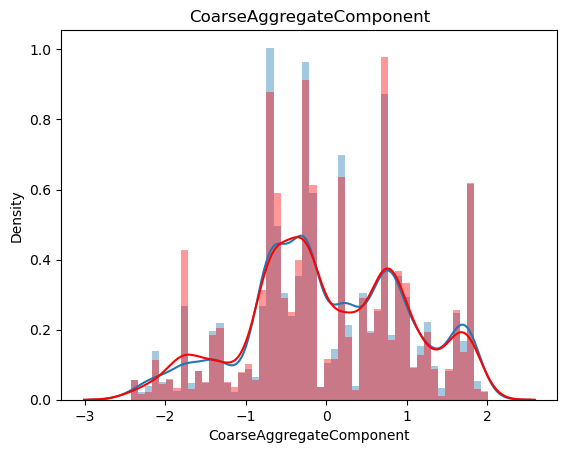

C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

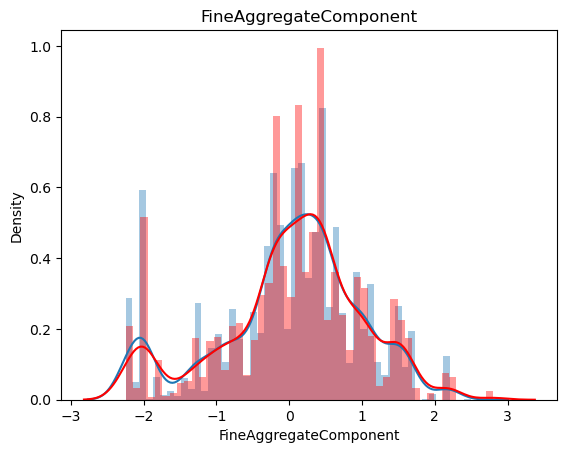

C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

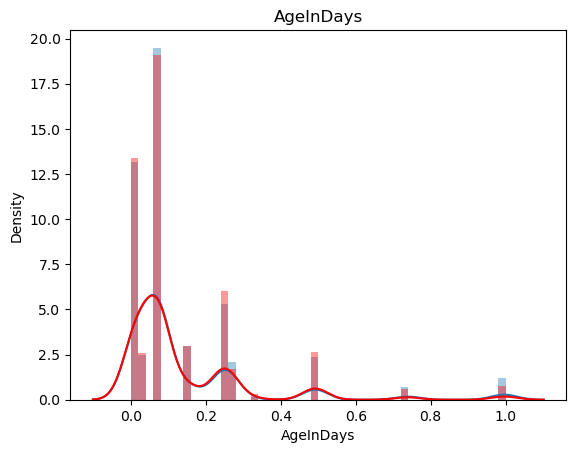

C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

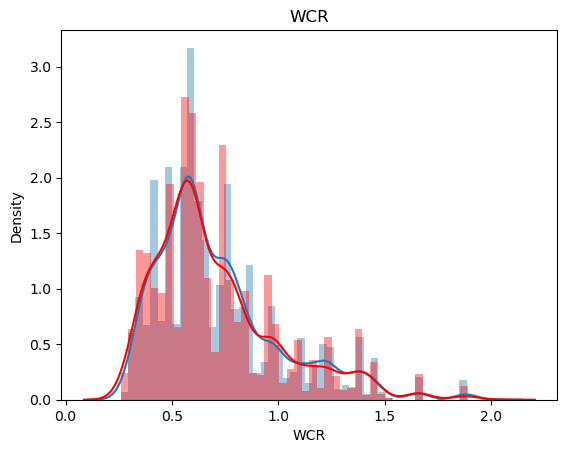

C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

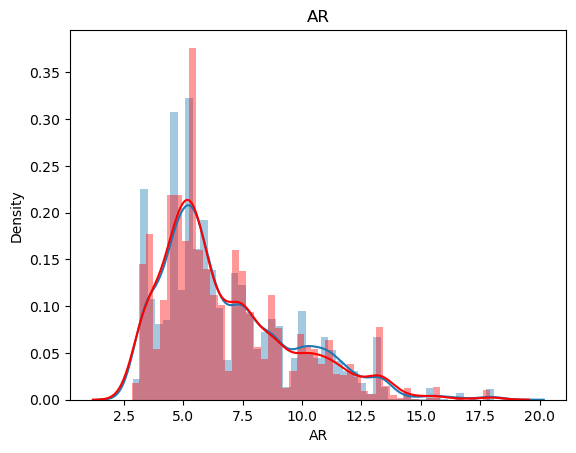

C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

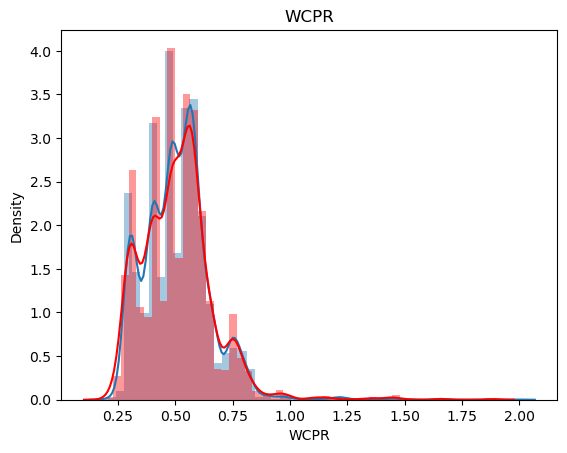

C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_4764\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

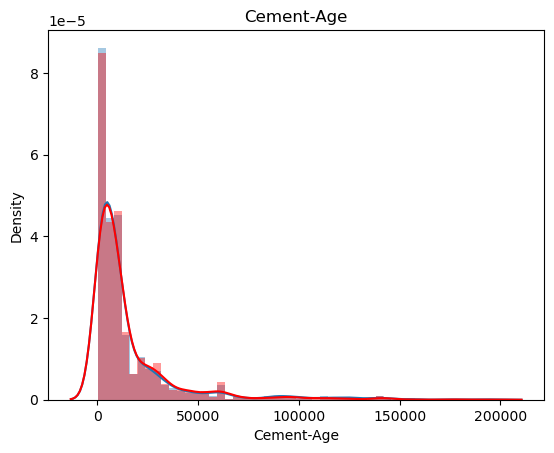

In [26]:
# 콘크리트의 강도는 물과 시멘트의 비율이 낮아지면 증가합니다.
# CementComponent:- Amount of cement is mixed
# BlastFurnaceSlag:- Amount of Blast Furnace Slag is mixed
# FlyAshComponent:- Amount of FlyAsh is mixed
# WaterComponent:- Amount of water is mixed
# SuperplasticizerComponent:- Amount of Super plasticizer is mixed
# CoarseAggregateComponent:- Amount of Coarse Aggregate is mixed
# FineAggregateComponent:- Amount of Coarse Aggregate is mixed
# AgeInDays:- How many days it was left dry
# Strength:- What was the final strength of concrete- (Target)
kor_col = ['시멘트양','용광로 찌꺼기','화석연료 재','물','감수제','건설골재양','미세골제양','양생일','강도']
for i in test.columns:
    plt.title(f'{i}')
    sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    sns.distplot(test[f'{i}'],color='red',bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    plt.show()


In [45]:
from pycaret import regression
regression.setup(session_id=1,data=train,target='Strength',
                 remove_outliers=True,
                feature_ratio=True,
                feature_selection_threshold=0.2)

,Description,Value
0,session_id,1
1,Target,Strength
2,Original Data,"(6117, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4067, 17)"


(None,
 10,
 1,
 3393    36.939999
 2635    31.900000
 4678    46.250000
 1037    18.030001
 471     12.550000
           ...    
 2763    32.770000
 905     17.200001
 5192    53.099998
 3980    40.270000
 5157    52.610001
 Name: Strength, Length: 4067, dtype: float32,
 {'parameter': 'Hyperparameters',
  'residuals': 'Residuals',
  'error': 'Prediction Error',
  'cooks': 'Cooks Distance',
  'rfe': 'Feature Selection',
  'learning': 'Learning Curve',
  'manifold': 'Manifold Learning',
  'vc': 'Validation Curve',
  'feature': 'Feature Importance',
  'feature_all': 'Feature Importance (All)',
  'tree': 'Decision Tree',
  'residuals_interactive': 'Interactive Residuals'},
 False,
 KFold(n_splits=10, random_state=None, shuffle=False),
       CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
 3393        -1.003158          1.539360        -0.625603        2.281930   
 2635        -1.464326          1.801299        -0.625603        0.993602   
 4678        -0.413203     

In [46]:
best = regression.compare_models(sort='RMSE',n_select=3,fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.0850,142.5190,11.9227,0.4661,0.3758,0.3508,0.0890
catboost,CatBoost Regressor,9.1830,146.7620,12.1015,0.4499,0.3792,0.3495,0.8200
lightgbm,Light Gradient Boosting Machine,9.3033,149.5739,12.2190,0.4392,0.3813,0.3530,0.0180
ridge,Ridge Regression,9.5725,157.4313,12.5359,0.4094,0.4148,0.3828,0.0040
lr,Linear Regression,9.5620,157.4600,12.5368,0.4093,0.4116,0.3819,0.0040
br,Bayesian Ridge,9.5737,157.4760,12.5377,0.4092,0.4147,0.3829,0.0040
ada,AdaBoost Regressor,10.1970,160.2834,12.6496,0.3978,0.4138,0.4292,0.0340
rf,Random Forest Regressor,9.7108,162.1568,12.7222,0.3918,0.3970,0.3674,0.2280
xgboost,Extreme Gradient Boosting,9.6841,162.3875,12.7307,0.3912,0.3987,0.3641,0.0620
en,Elastic Net,10.1480,168.8482,12.9867,0.3663,0.4411,0.4065,0.0070


In [47]:
best_tune = [regression.tune_model(i) for i in best]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.1655,141.3271,11.8881,0.4337,0.3855,0.3753
1,8.9708,137.3461,11.7195,0.4371,0.3864,0.3674
2,9.3349,160.4399,12.6665,0.4587,0.3751,0.3347
3,8.5401,129.7192,11.3894,0.5096,0.3265,0.2893
4,8.9806,137.0560,11.7071,0.4462,0.3696,0.3408
5,9.0103,132.4148,11.5072,0.5068,0.4081,0.4092
6,9.4491,154.0303,12.4109,0.4169,0.3858,0.3620
7,8.6741,120.7427,10.9883,0.5040,0.3546,0.3331
8,9.5764,164.0045,12.8064,0.4805,0.3937,0.3653


In [52]:
best_tune

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.05, loss='ls', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=260,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 LGBMRegressor(bagging_fraction=0.5, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.5,
               n

In [53]:
target = 'Strength'
features = list(test.columns)

In [54]:
best_tune[0]

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=260,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
best_tune[0].feature_importances_

array([0.02284884, 0.01422588, 0.01555041, 0.03206138, 0.03929021,
       0.02154934, 0.02154256, 0.00924269, 0.0244947 , 0.02103456,
       0.03364831, 0.10688625, 0.01556386, 0.20687317, 0.16969716,
       0.17638596, 0.06910472])

In [56]:
plt.figure(figsize = (5, 6))
# cat_imp = np.zeros(len(best_tune[0].feature_importances_))
# for model in models[:10]:
#     cat_imp += model.feature_importances_
model_number = 0
cat_imp = best_tune[model_number].feature_importances_
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "orange", edgecolor = "#000000")

plt.title(f"{best_tune[model_number]}")
plt.show()



IndexError: list index out of range

<Figure size 500x600 with 0 Axes>

In [57]:
plt.figure(figsize = (5, 6))
# cat_imp = np.zeros(len(best_tune[0].feature_importances_))
# for model in models[:10]:
#     cat_imp += model.feature_importances_
model_number = 1
cat_imp = best_tune[model_number].feature_importances_
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "blue", edgecolor = "#000000")

plt.title(f"{best_tune[model_number]}")
plt.show()



IndexError: list index out of range

<Figure size 500x600 with 0 Axes>

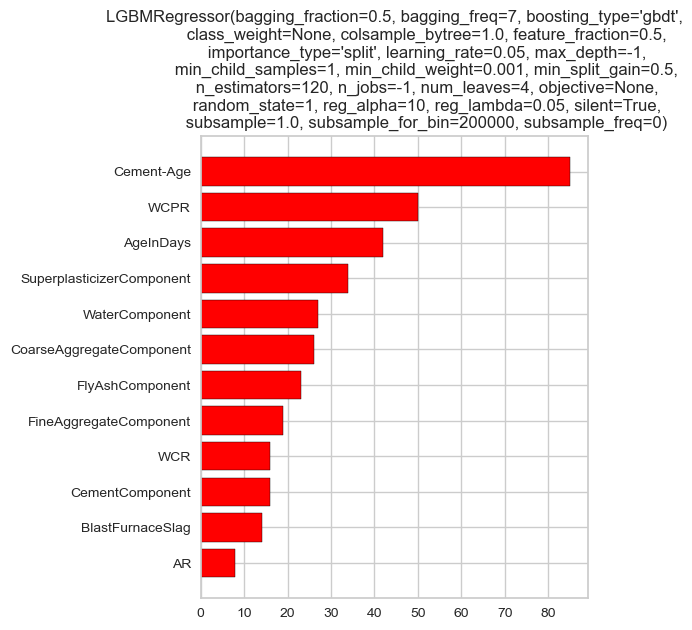

In [36]:
plt.figure(figsize = (5, 6))
# cat_imp = np.zeros(len(best_tune[0].feature_importances_))
# for model in models[:10]:
#     cat_imp += model.feature_importances_
model_number = 2
cat_imp = best_tune[model_number].feature_importances_
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "red", edgecolor = "#000000")

plt.title(f"{best_tune[model_number]}")
plt.show()


In [37]:
train.loc[:,list(test.columns)]

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,WCR,AR,WCPR,Cement-Age
0,-0.588390,-0.722833,1.037979,-0.042318,0.397002,-0.545595,0.956539,0.005495,0.786142,7.673225,0.559683,701.4
1,0.631291,1.527454,-0.625603,-1.036171,1.246188,-0.575290,-0.198304,0.005495,0.454771,4.689741,0.298949,1087.8
2,-1.156565,-0.126328,0.417213,-1.320128,1.176867,-0.286094,0.005566,0.005495,0.917722,10.005754,0.563206,521.4
3,-1.776822,1.210747,-0.625603,0.993602,-0.764131,-0.659208,0.981865,0.005495,1.879040,16.502308,0.751755,324.9
4,-1.239897,0.807124,1.697432,-0.499806,0.639626,0.213543,-0.314802,0.005495,1.061212,10.620606,0.411419,495.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6112,1.245866,-0.157285,-0.625603,2.281930,-0.764131,-0.739253,-2.247139,0.244505,0.533333,3.569591,0.480000,38475.0
6113,2.311193,-0.722833,-0.625603,-0.610234,-0.764131,1.752476,-2.006546,0.739011,0.320370,3.218519,0.320370,145800.0
6114,-0.547671,-0.722833,-0.625603,0.057593,-0.764131,1.672431,0.225898,0.074176,0.779924,8.013860,0.779924,6666.8
6115,0.164441,-0.722833,1.361551,-0.263174,0.778269,0.163192,-1.047976,0.074176,0.573252,5.396106,0.421300,8772.4


In [58]:
enssemble = []
for i in range(len(best_tune)):
    best_tune[i].fit(train.drop('Strength',axis=1),train['Strength'])
    enssemble.append(best_tune[i].predict(test))

In [59]:
enssemble

[array([47.13657987, 19.04201694, 31.69445122, ..., 43.20497683,
        47.04945388, 21.94572616]),
 array([47.49841588, 19.0110319 , 32.6850587 , ..., 40.3161578 ,
        36.02041058, 21.32744131]),
 array([45.7467084 , 20.23051883, 33.17868407, ..., 38.43506523,
        31.10890876, 23.36524318])]

In [60]:
enssemble = np.array(enssemble)
enssemble.mean(axis=0)

array([46.79390139, 19.42785589, 32.519398  , ..., 40.65206662,
       38.05959107, 22.21280355])

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


<AxesSubplot: ylabel='Frequency'>

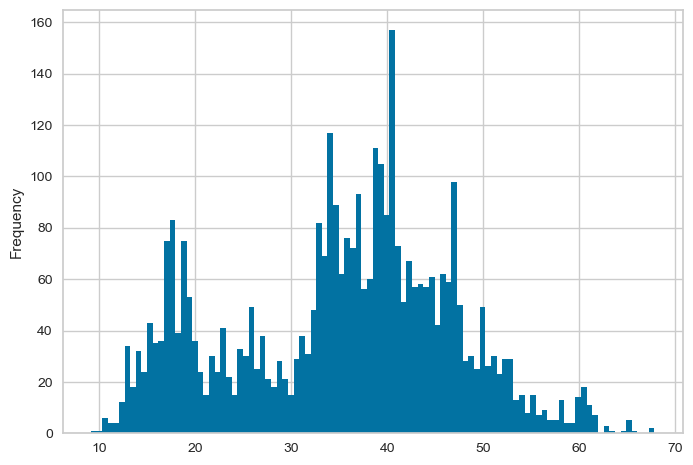

In [61]:
sub = pd.read_csv('./sample_submission.csv')
md = best_tune[2].fit(train.drop('Strength',axis=1),train['Strength'])
sub['Strength'] = enssemble[0]#md.predict(test)
#enssemble[0] #.mean(axis=0)
sub = sub.set_index('id')
sub.to_csv('./submission.csv')
sub['Strength'].plot.hist(bins=100)

<AxesSubplot: xlabel='Strength', ylabel='Density'>

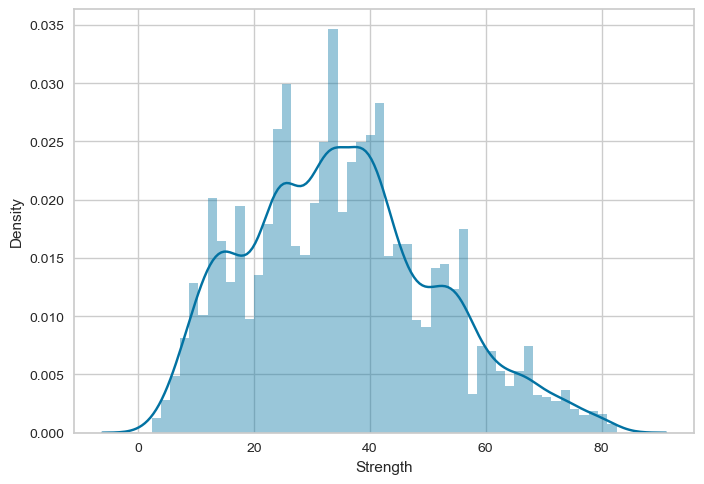

In [62]:
sns.distplot(train.Strength,bins=50)

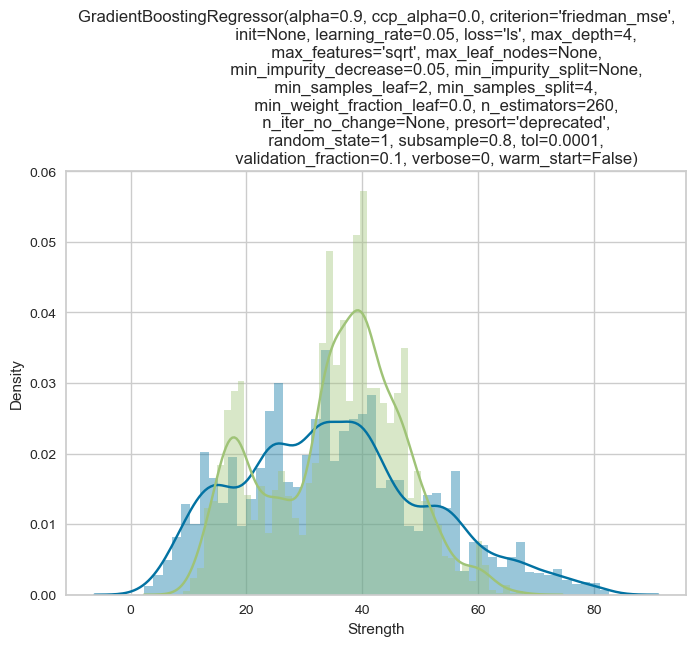

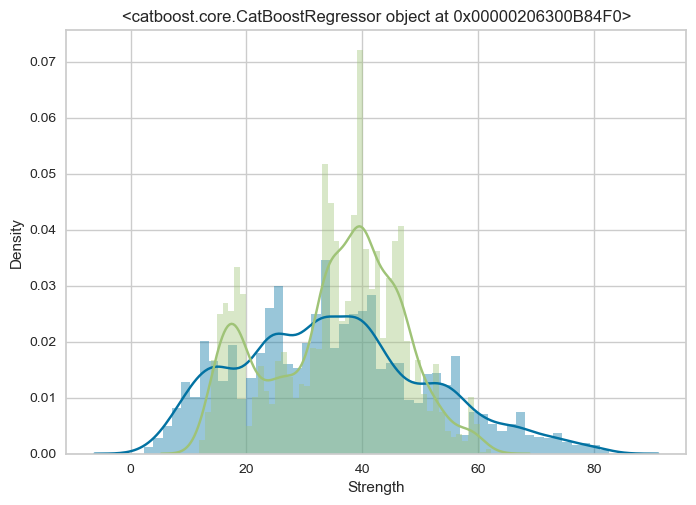

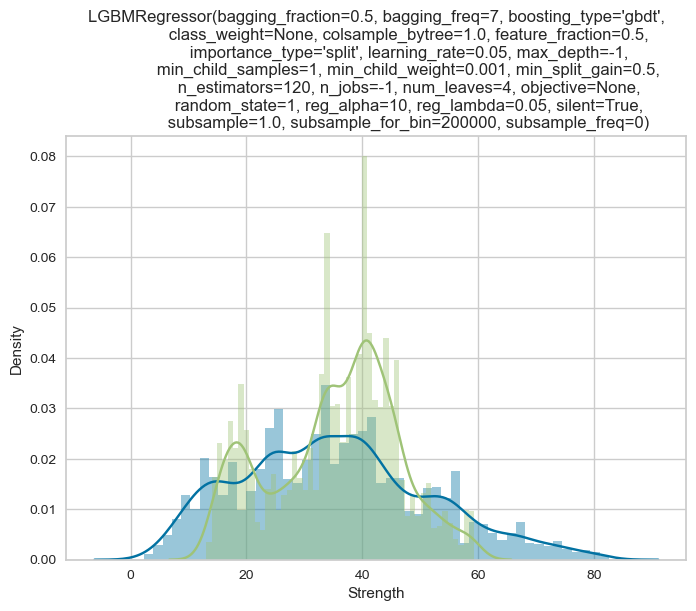

In [63]:
preds = []
for i in range(len(best_tune)):
    md = best_tune[i].fit(train.drop('Strength',axis=1),train['Strength'])
    pred = md.predict(test)
    preds.append(pred)
    
    plt.title(f'{md}')    
    sub['Strength'] = pred
    sns.distplot(train.Strength,bins=50)
    sns.distplot(sub['Strength'],bins=50)
    # sns.distplot(density_values)
    plt.show()